In [ ]:
!pip uninstall keras
!pip install keras==2.2.4


In [9]:
from tensorflow import keras
print(tensorflow.__version__)
print(keras.__version__)

2.5.0
2.5.0


#VGG16으로 ImageNet 분류

## 이미지 파일 다운로드

단지 모델의 동작만 imagenet의 파일로 으로 확인하려고 한다.

전체 imagenet은 아주 크다. 몇 개 파일 일부만 다운로드해서 확인한다.

각 파일의 url은 http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02097474 을 호출하여 구하였다.


clsid n07734744은 버섯, n02097474는 강아지, n02123159은 고양이 이다.

In [1]:
!rm -rf imagenet
!mkdir imagenet

# 버섯

!wget -O imagenet/mushroom1.jpg http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
!wget -O imagenet/mushroom2.jpg http://farm3.static.flickr.com/2416/1593642808_efcef6c9c2.jpg
!wget -O imagenet/mushroom3.jpg http://farm4.static.flickr.com/3003/2536991564_5f9b2f5b53.jpg
  
# 강아지
!wget -O imagenet/dog1.jpg http://farm1.static.flickr.com/58/160964915_d708f48d0d.jpg
!wget -O imagenet/dog2.jpg http://farm1.static.flickr.com/51/144906086_049df05364.jpg
!wget -O imagenet/dog3.jpg http://farm3.static.flickr.com/2133/2236535445_ca650757f2.jpg
  
# 고양이  
!wget -O imagenet/cat1.jpg http://farm1.static.flickr.com/131/393656824_bd89c512d0.jpg
!wget -O imagenet/cat2.jpg http://farm1.static.flickr.com/213/505539125_d7193beb76.jpg
!wget -O imagenet/cat3.jpg http://farm1.static.flickr.com/24/63785988_c16c10b4e5.jpg
  
  
!ls -al imagenet  
  

--2021-08-12 00:41:52--  http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Resolving farm4.static.flickr.com (farm4.static.flickr.com)... 99.84.192.159, 2600:9000:20c5:9e00:0:5a51:64c9:c681, 2600:9000:20c5:f800:0:5a51:64c9:c681, ...
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|99.84.192.159|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg [following]
--2021-08-12 00:41:52--  https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|99.84.192.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘imagenet/mushroom1.jpg’

imagenet/mushroom1.     [ <=>                ]  59.96K  --.-KB/s    in 0.007s  

2021-08-12 00:41:52 (8.13 MB/s) - ‘imagenet/mushroom1.jpg’ saved [61397]

--2021-08-12 00:41:52--  http://farm3.static.flickr.com

##분류 실행
pretrained VGG16 모델을 사용하여 ImageNet 데이터를 대상으로 분류한다.



In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
from IPython.display import display # 이미지 출력 함수
import numpy as np



def predict_vgg16(model, filename) :

  # 이미지 파일을 읽고 화면에 표시
  image = load_img(filename)
  # image = PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=688x550
  display(image)

  
  # 모델 사이즈로 이미지 파일을 읽기
  image = load_img(filename, target_size=(224, 224))
  # image = PIL.Image.Image image mode=RGB size=224x224

  
  # 이미지 데이터를 numpy로 변환
  image = img_to_array(image)
  # [
  #   [[211. 184. 163.]
  #   [225. 193. 170.]
  #   ...
  #   [237. 202. 180.]]
  #   ...
  # ]  
  #
  # image.shape = (224, 224, 3)

  # vgg16.preprocess_input()을 호출하기 위해 차원을 조정
  # 보통 모델을 여러 이미지를 한번에 호출. 
  # 맨 앞의 1 : 이미지 갯수가 1개라는 것.
  # 두번째 224 : 가로
  # 세번째 224 : 세로
  # 네번째 3 : R, G, B 3개
  image = image.reshape((1, 224, 224, 3))

  # VGG16 모델 호출을 위해 데이터 전처리.
  # -255 ~ 255 사이 값으로 정규화한다.
  # 그리고 RGB를 BGR순으로 바꾼다.
  image = vgg16.preprocess_input(image)
  
  
  # 이미지를 모델에 적용
  yhat = model.predict(image)
  # yhat = [[2.03485320e-06 4.21382174e-06 1.45730738e-07 1.04057870e-06
  #          6.61934010e-08 2.63145339e-04 4.49358195e-05 2.03222541e-08
  #          ... ]] # 1000개 클래스에 대한 결과값.
  #
    
    
  # 모델 적용된 결과를 파싱
  label = vgg16.decode_predictions(yhat)
  # label = [[('n02655020', 'puffer', 0.9612253), ... ]]

  # 가장 확률이 높은 결과를 획득
  label = label[0][0]
  # label = ('n02655020', 'puffer', 0.9612253)

  # 라벨과 라벨을 예측한 확률을 출력
  print('%s (%.2f%%)' % (label[1], label[2]*100))    

    

    


In [3]:
from keras.applications import vgg16

# VGG16 모델 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()

# 테스트 할 이미지 파일들
files = [
    'imagenet/mushroom1.jpg',
     'imagenet/mushroom2.jpg',
     'imagenet/mushroom3.jpg',
     'imagenet/dog1.jpg',
     'imagenet/dog2.jpg',
     'imagenet/dog3.jpg',
     'imagenet/cat1.jpg',
     'imagenet/cat2.jpg',
     'imagenet/cat3.jpg',
    ]

# 분류 실행
for file in files :
  predict_vgg16(model, file)  

Output hidden; open in https://colab.research.google.com to view.

# 커스텀 데이터 분류


  

## 커스텀 데이터 업로드


In [ ]:
# from google.colab import files

# # 파일이름 dental_image.tar.gz
# uploaded = files.upload()

# !ls -al 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.environ['VGG16-DENTAL']='/content/drive/MyDrive/딥러닝 영상분류 영상인식 입문/dental_image'

In [ ]:
# # 기존 폴더 있으면 삭제
# !rm -rf dental_image

# # 압축 파일을 풀기
# !tar xvfz dental_image.tar.gz

# !ls -al

In [6]:
cd /content/drive/MyDrive/딥러닝 영상분류 영상인식 입문

/content/drive/MyDrive/딥러닝 영상분류 영상인식 입문


## 커스텀 데이타의 분류 실행


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

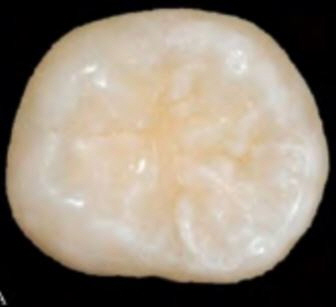

jellyfish (56.30%)


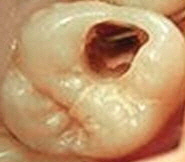

tick (10.93%)


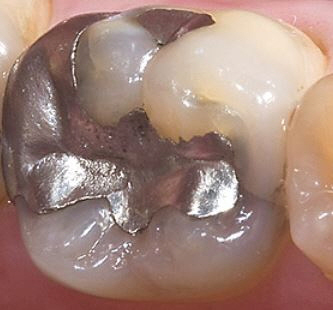

conch (31.76%)


In [ ]:
from keras.applications import vgg16

# VGG16 모델을 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()
  

files = [
    'dental_image/test/healthy/1.jpg',
    'dental_image/test/decayed/101.jpg',
    'dental_image/test/cured/301.jpg'
        ]

  
for file in files :
  predict_vgg16(model, file)   


# 커스텀 데이터로 학습



## 데이터 로더 준비

Keras에서 제공하는 ImageDataGenerator를 사용한다.

적은 수의 데이터를 커버하기 위하여 데이터 증강을 한다.


In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'dental_image/train'
validation_dir = 'dental_image/test'
batch_size = 32
image_size = 224

# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(
      rotation_range=180, # 회전 최대 180도
      width_shift_range=0.2, # 좌우 이동
      height_shift_range=0.2, # 상하 이동
      horizontal_flip=True, # 상하 반전
      vertical_flip=True, # 좌우 반전
      )
 
# 검증에 사용될 이미지 데이터 생성기
validation_datagen = ImageDataGenerator()
 

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_num=len(train_generator.class_indices)

custom_labels = list(validation_generator.class_indices.keys())

Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


## 모델 새로 정의
이미 학습된 VGG16의 conv 레이어는 그대로 두고
Fully Connected 레이어 부분만 새로 정의한다.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
import keras.backend as K

K.clear_session() # 새로운 세션으로 시작 out of memory 발생시 메모리 제거

from keras.applications.vgg16 import VGG16
# 모델 불러오기 VGG16의 feature instanc를 사용
# include_top=모델의 뒷부분 
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
conv_layers.summary()

# Convolution Layer를 학습되지 않도록 고정 
for layer in conv_layers.layers:
    layer.trainable = False


# 새로운 모델 생성하기
model = models.Sequential()

# VGG16모델의 Convolution Layer를 추가
model.add(conv_layers)
 
# 모델의 Fully Connected 부분을 재구성
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_num, activation='softmax'))

# 모델
model.summary()



vgg16_model_path = 'new_trained_from_vgg16.h5'

model.save(vgg16_model_path)

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

## 모델 학습

In [ ]:
import wandb
from wandb.keras import WandbCallback

# 1. Start a new run
wandb.init(project='dental_classification', entity='elefun', reinit=True)
wandb.run.name = 'dental-VGG16'
wandb.run.save()
# 2. Save model inputs and hyperparameters
config = wandb.config
config.learning_rate = 1e-4

epoch,99
loss,1.14931
acc,0.79333
val_loss,2.73704
val_acc,0.75
_runtime,396
_timestamp,1628649578
_step,99
best_val_loss,1.60929
best_epoch,49


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▄▄▃▃▂▂▂▂▂▁▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,▁▃▃▄▄▅▆▆▅▆▆▆▆▅▆▆▇▇▆▇██▇▆▇▇▇▇▇▇▇▇▇██▇▇█▇▇
val_loss,█▃▃▂▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▅▅▆▅▅▆▅▆▆▆▆▆▆▇▇▆▇▇▆▇▇▆█▆▇▆█▅▆▇▆▆▆▇▆▆▃▇█
_runtime,▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


wandb: WARNING Calling run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


In [ ]:
from keras.models import load_model

# 모델 로딩
model = load_model(vgg16_model_path)

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1,
      callbacks=[WandbCallback()])
 
# 모델 저장
model.save(vgg16_model_path)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
4/4 [==============================] - 5s 866ms/step - loss: 1.8205 - acc: 0.8072 - val_loss: 3.2821 - val_acc: 0.6667
Epoch 2/100
4/4 [==============================] - 4s 791ms/step - loss: 1.6184 - acc: 0.8047 - val_loss: 2.2284 - val_acc: 0.7167
Epoch 3/100
4/4 [==============================] - 3s 641ms/step - loss: 0.7038 - acc: 0.8782 - val_loss: 2.5769 - val_acc: 0.6167
Epoch 4/100
4/4 [==============================] - 3s 653ms/step - loss: 0.5631 - acc: 0.8866 - val_loss: 2.5417 - val_acc: 0.6667
Epoch 5/100
4/4 [==============================] - 3s 732ms/step - loss: 0.7544 - acc: 0.8398 - val_loss: 2.4794 - val_acc: 0.7000
Epoch 6/100
4/4 [==============================] - 3s 730ms/step - loss: 0.8059 - acc: 0.8137 - val_loss: 3.9718 - val_acc: 0.6167
Epoch 7/100
4/4 [==============================] - 3s 647ms/step - loss: 0.7963 - acc: 0.8633 - val_loss: 2.7205 - val_acc: 0.7333
Epoch 8/100
4/4 [==============================] - 3s 627ms/step - loss: 0.8180 - a

## 학습 중의 로스와 정확도 보기
 accuracy와 loss의 그래프를 확인

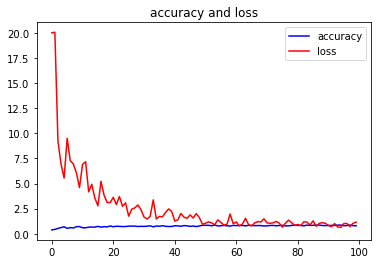

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='accuracy')
plt.plot(epochs, loss, 'r', label='loss')
plt.title('accuracy and loss')
plt.legend()
  
plt.show()

## 새로 학습된 모델로 분류 실행

학습된 모델 파일을 읽어서 분류를 실행한다.


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
from IPython.display import display
import numpy as np


def predict_custom_vgg16(model, filename) :

  image = load_img(filename)
  display(image)
  
  image = load_img(filename, target_size=(224, 224))

  image = img_to_array(image)
  image = image.reshape((1, 224, 224, 3))
  
  image = vgg16.preprocess_input(image)
  
  
  yhat = model.predict(image)
    

  # 최대 출력 인덱스를 구한다.
  idx=np.argmax(yhat[0])

  # 커스텀 레이블을 출력한다.
  print('%s (%.2f%%)' % (custom_labels[idx], yhat[0][idx]*100))
    
    
    
    


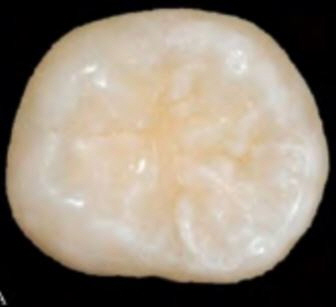

cured (86.52%)


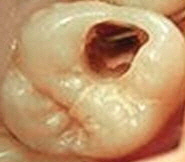

decayed (100.00%)


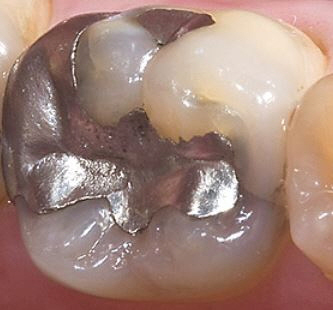

cured (100.00%)


In [ ]:
from keras.models import load_model

model = load_model(vgg16_model_path)
  
files = [
    'dental_image/test/healthy/1.jpg',
    'dental_image/test/decayed/101.jpg',
    'dental_image/test/cured/301.jpg'
        ]

  
for file in files :
  predict_custom_vgg16(model, file)     
  

data가 충분하지 못해서 땜질한 사진이 완치되었다고 오분류가 되었습니다.

# ResNet으로 ImageNet 분류

## 분류 실행

실행 방법도 앞의 VGG16과 동일하다.

앞의 predict_vgg16()과 전체 구조는 완벽히 동일하다.

비교를 위해 커멘트를 전부 삭제하였고, 다른 부분만 커멘트를 달았다.

In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
#from keras.applications import vgg16
from keras.applications import resnet50
from IPython.display import display
import numpy as np


def predict_resnet50(model, filename) :

  image = load_img(filename)
  display(image)
  
  image = load_img(filename, target_size=(224, 224))

  
  image = img_to_array(image)

  image = image.reshape((1, 224, 224, 3))

#  image = vgg16.preprocess_input(image)
  image = resnet50.preprocess_input(image)
  
  
  yhat = model.predict(image)
    
    
#  label = vgg16.decode_predictions(yhat)
  label = resnet50.decode_predictions(yhat)

  label = label[0][0]
  
  print('%s (%.2f%%)' % (label[1], label[2]*100))
  

  


In [9]:
#from keras.applications import vgg16
from keras.applications import resnet50

# RestNet50 모델 불러오기
#model = vgg16.VGG16()
model = resnet50.ResNet50()

model.summary()

files = ['/content/imagenet/mushroom1.jpg',
         '/content/imagenet/mushroom2.jpg',
         '/content/imagenet/mushroom3.jpg',
         '/content/imagenet/dog1.jpg',
         '/content/imagenet/dog2.jpg',
         '/content/imagenet/dog3.jpg',
         '/content/imagenet/cat1.jpg',
         '/content/imagenet/cat2.jpg',
         '/content/imagenet/cat3.jpg',
        ]

for file in files :
#  predict_vgg16(model, file)  
  predict_resnet50(model, file)    



Output hidden; open in https://colab.research.google.com to view.

## 모델 새로 정의

내용은 vGG16과 동일하다.


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Input, Activation
from keras.models import Model
from keras import models
from keras import layers
import keras.backend as K

K.clear_session()

image_size=224
#from keras.applications.vgg16 import VGG16
from keras.applications.resnet import  ResNet50
#conv_layers = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
conv_layers_r = ResNet50(input_shape=(image_size,image_size, 3), weights='imagenet', include_top=False, pooling='max')
conv_layers_r.summary()

# Convolution Layer를 학습되지 않도록 고정 
for layer in conv_layers_r.layers:
    layer.trainable = False






94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________

In [8]:
conv_layers_r.input_shape
class_num=3

In [9]:
# 새로운 모델 생성하기
model = models.Sequential()

# VGG16모델의 Convolution Layer를 추가
model.add(conv_layers_r)
 
# 모델의 Fully Connected 부분을 재구성
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_num, activation='softmax'))

# 모델
model.summary()

# vgg16_model_path = 'new_trained_from_vgg16.h5'
resnet50_model_path = 'new_trained_from_resnet50.h5'

# model.save(vgg16_model_path)
model.save(resnet50_model_path)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3075      
Total params: 25,688,963
Trainable params: 2,101,251
Non-trainable params: 23,587,712
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## 모델 학습

In [1]:
!pip install wandb

     |████████████████████████████████| 1.6 MB 8.3 MB/s 
     |████████████████████████████████| 170 kB 66.4 MB/s 
     |████████████████████████████████| 97 kB 9.5 MB/s 
     |████████████████████████████████| 133 kB 63.3 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=cd165f34c4e2602e01232865b8dda942d2c1afe131ed5a9360c2866a3f510a78
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=75db1a11f228eb881ab730dfae19ec6d7e9a97989584e060f5f32db69c851adb
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [ ]:
import wandb
from wandb.keras import WandbCallback

# 1. Start a new run
wandb.init(project='dental_classification', entity='elefun', reinit=True)
wandb.run.name = 'dental-ResNet'
# generted run ID로 하고 싶다면 다음과 같이 쓴다.
# wandb.run.name = wandb.run.id

# 2. Save model inputs and hyperparameters
config = wandb.config
config.learning_rate = 1e-4

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
from keras.models import load_model

#model = load_model(vgg16_model_path)
model = load_model(resnet50_model_path)


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 

#model.save(vgg16_model_path)
wandb.run.save()
model.save(resnet50_model_path)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Epoch 1/100
5/4 [================================] - 15s 3s/step - loss: 9.6846 - acc: 0.3049 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 2/100
5/4 [================================] - 1s 221ms/step - loss: 10.5673 - acc: 0.3444 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 3/100
5/4 [================================] - 1s 218ms/step - loss: 10.7200 - acc: 0.3349 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 4/100
5/4 [================================] - 1s 222ms/step - loss: 10.8344 - acc: 0.3278 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 5/100
5/4 [================================] - 2s 401ms/step - loss: 10.7581 - acc: 0.3325 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 6/100
5/4 [================================] - 2s 466ms/step - loss: 10.8344 - acc: 0.3278 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 7/100
5/4 [================================] - 2s 466ms/step - loss: 10.7963 - acc: 0.3302 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 8/100
5/4 [================================] - 2s 47

## 학습 중의 로스와 정확도 보기


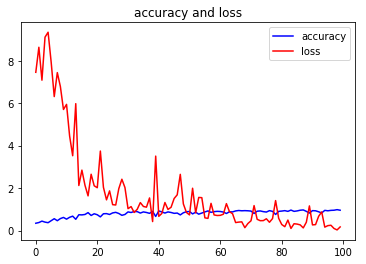

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='accuracy')
plt.plot(epochs, loss, 'r', label='loss')
plt.title('accuracy and loss')
plt.legend()
  
plt.show()

## 새로 학습된 모델로 분류 실행

학습된 모델 파일을 읽어서 분류를 실행한다.


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
#from keras.applications import vgg16
from keras.applications import resnet50
from IPython.display import display
import numpy as np


def predict_custom_resnet50(model, filename) :

  image = load_img(filename)
  display(image)
  
  image = load_img(filename, target_size=(224, 224))

  image = img_to_array(image)
  image = image.reshape((1, 224, 224, 3))
  
#  image = vgg16.preprocess_input(image)
  image = resnet50.preprocess_input(image)
  
  
  yhat = model.predict(image)
    

  # 최대 출력 인덱스를 구한다.
  idx=np.argmax(yhat[0])

  # 커스텀 레이블을 출력한다.
  print('%s (%.2f%%)' % (custom_labels[idx], yhat[0][idx]*100))
    
    
    
    


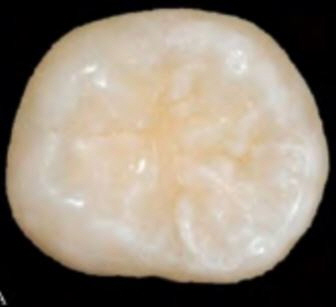

healthy (100.00%)


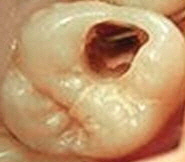

decayed (100.00%)


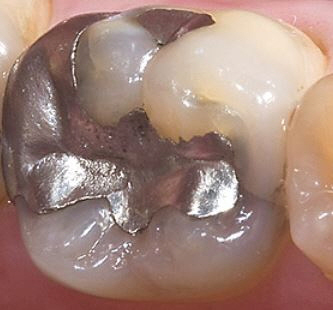

decayed (99.99%)


In [ ]:
from keras.models import load_model

model = load_model(resnet50_model_path)
  
files = [
    'dental_image/test/healthy/1.jpg',
    'dental_image/test/decayed/101.jpg',
    'dental_image/test/cured/301.jpg'
        ]

  
for file in files :
  predict_custom_resnet50(model, file)     
  